
Ridge Regression Results:
Accuracy: 0.69
Precision: 0.62
Recall: 0.69
F1 Score: 0.65
R-squared: 0.61

Confusion Matrix (Ridge Regression):
[[ 58  13  15   0]
 [ 42   3  48   0]
 [ 12   7  94  54]
 [  0   0   7 281]]

Classification Report (Ridge Regression):
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        86
           1       0.13      0.03      0.05        93
           2       0.57      0.56      0.57       167
           3       0.84      0.98      0.90       288

    accuracy                           0.69       634
   macro avg       0.52      0.56      0.53       634
weighted avg       0.62      0.69      0.65       634



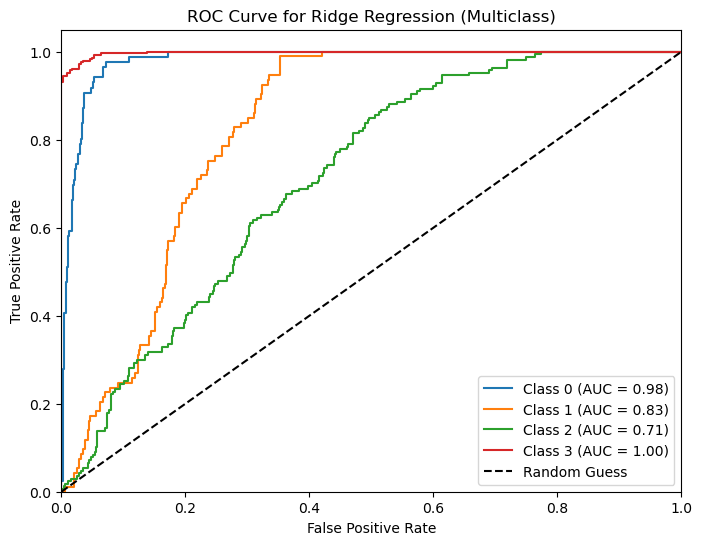

Weighted ROC-AUC Score (Ridge Regression): 0.90


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, r2_score, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Train the Ridge Regression Model
ridge_model = RidgeClassifier(random_state=42)
ridge_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred_ridge = ridge_model.predict(X_test)

# Metrics for Ridge Regression
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
precision_ridge = precision_score(y_test, y_pred_ridge, average='weighted')
recall_ridge = recall_score(y_test, y_pred_ridge, average='weighted')
f1_ridge = f1_score(y_test, y_pred_ridge, average='weighted')
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
classification_rpt_ridge = classification_report(y_test, y_pred_ridge)

# Calculate R-squared (pseudo R-squared for Ridge Regression)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display metrics for Ridge Regression
print("\nRidge Regression Results:")
print(f"Accuracy: {accuracy_ridge:.2f}")
print(f"Precision: {precision_ridge:.2f}")
print(f"Recall: {recall_ridge:.2f}")
print(f"F1 Score: {f1_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")
print("\nConfusion Matrix (Ridge Regression):")
print(conf_matrix_ridge)
print("\nClassification Report (Ridge Regression):")
print(classification_rpt_ridge)

# Step 5: Visualize ROC Curve for Ridge Regression
# Binarize the output labels for ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Get decision function scores for Ridge Regression
y_score_ridge = ridge_model.decision_function(X_test)

# Compute ROC curve and AUC for each class
fpr_ridge = {}
tpr_ridge = {}
roc_auc_ridge = {}

for i in range(n_classes):
    fpr_ridge[i], tpr_ridge[i], _ = roc_curve(y_test_binarized[:, i], y_score_ridge[:, i])
    roc_auc_ridge[i] = auc(fpr_ridge[i], tpr_ridge[i])

# Plot ROC curves for Ridge Regression
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_ridge[i], tpr_ridge[i], label=f"Class {i} (AUC = {roc_auc_ridge[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ridge Regression (Multiclass)')
plt.legend(loc='lower right')
plt.show()

# Compute weighted average AUC (optional)
weighted_roc_auc_ridge = roc_auc_score(y_test_binarized, y_score_ridge, average="weighted", multi_class="ovr")
print(f"Weighted ROC-AUC Score (Ridge Regression): {weighted_roc_auc_ridge:.2f}")
